Tri Utami Gita Cahyani / 4112322012 / Statistika Terapan dan Komputasi

# Dataset

Dataset dapat didownload pada link berikut https://bit.ly/datatuning

Dataset ini berisi informasi mengenai pengajuan pinjaman oleh individu, dengan berbagai fitur yang dapat memengaruhi keputusan persetujuan pinjaman. Tujuan utama dari dataset ini
adalah untuk membangun model Machine Learning yang dapat memprediksi apakah suatu pengajuan pinjaman akan disetujui (Loan_Approval = 1) atau ditolak (Loan_Approval = 0)
berdasarkan karakteristik pemohon.

In [1]:
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/geetacahya/4112322012_Tuning-Model/refs/heads/main/loan_approval_dataset.csv

--2025-03-16 05:04:32--  https://raw.githubusercontent.com/geetacahya/4112322012_Tuning-Model/refs/heads/main/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18213 (18K) [text/plain]
Saving to: ‘loan_approval_dataset.csv’

loan_approval_datas 100%[===================>]  17.79K  --.-KB/s    in 0.001s  

2025-03-16 05:04:32 (25.3 MB/s) - ‘loan_approval_dataset.csv’ saved [18213/18213]



In [3]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0


# Eksplorasi Data

**Identifikasi apakah terdapat missing values dalam dataset.**

In [4]:
df.isnull().sum()

,0
Age,0
Income,0
Education_Level,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Loan_Approval,0


Tidak terdapat missing value dalam dataset, yang berarti setiap entri dalam semua kolom telah terisi dengan nilai yang valid. Hal ini menunjukkan bahwa data sudah bersih dalam hal kelengkapan, sehingga tidak perlu dilakukan imputasi atau penghapusan data akibat kekosongan nilai.

**Visualisasikan data tersebut**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

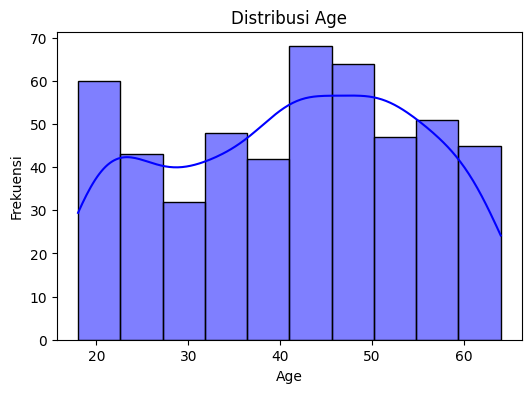

In [6]:
# 1. Histogram distribusi "Age"
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=10, kde=True, color="blue")
plt.title("Distribusi Age")
plt.xlabel("Age")
plt.ylabel("Frekuensi")
plt.show()

Visualisasi distribusi usia menunjukkan bahwa mayoritas peminjam berada dalam rentang usia menengah, dengan jumlah yang lebih sedikit di usia yang lebih muda dan lebih tua. Pola distribusi ini mengindikasikan bahwa kelompok usia produktif lebih banyak mengajukan pinjaman dibandingkan kelompok usia lainnya. Selain itu, adanya sedikit penyebaran di usia yang lebih tua dapat menunjukkan bahwa semakin bertambahnya usia, kemungkinan untuk mengajukan pinjaman berkurang.

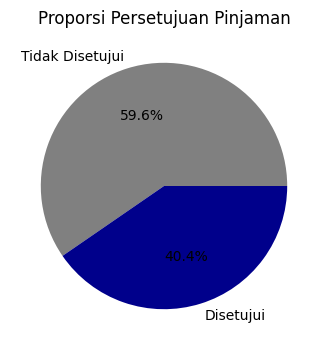

In [7]:
# 2. Pie chart persetujuan pinjaman
plt.figure(figsize=(6, 4))
df["Loan_Approval"].value_counts().plot.pie(autopct='%1.1f%%', colors=["grey", "darkblue"], labels=["Tidak Disetujui", "Disetujui"])
plt.title("Proporsi Persetujuan Pinjaman")
plt.ylabel("")
plt.show()

Visualisasi pie chart persetujuan pinjaman menunjukkan proporsi antara pengajuan pinjaman yang disetujui dan yang tidak disetujui. Dari grafik, terlihat bahwa sebagian besar pengajuan pinjaman tidak disetujui, ditunjukkan oleh bagian abu-abu yang lebih besar dibandingkan dengan bagian biru yang mewakili pinjaman yang disetujui.

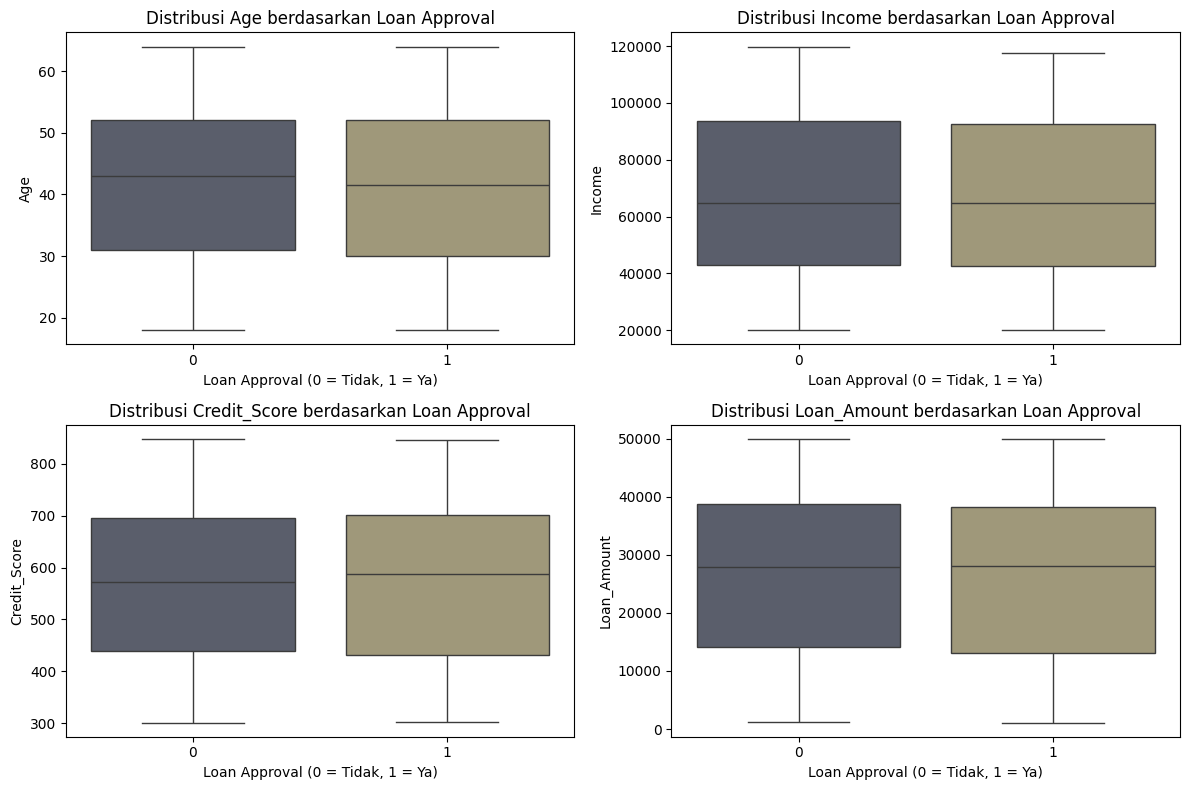

In [8]:
# 3. Boxplot Berdasarkan Loan Approval
# Pilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

# Buat subplot untuk setiap kolom numerik kecuali Loan_Approval
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["Loan_Approval"], y=df[col], hue=df["Loan_Approval"], palette="cividis", legend=False)
    plt.title(f"Distribusi {col} berdasarkan Loan Approval")
    plt.xlabel("Loan Approval (0 = Tidak, 1 = Ya)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Berikut penjelasan visualisasi Boxplot diatas:
1.   Boxplot Age vs Loan Approval: Peminjam yang mendapatkan persetujuan dan penolakan pinjaman memiliki distribusi usia yang hampir serupa, namun terdapat beberapa outlier pada usia yang lebih tua. Tidak ada perbedaan signifikan dalam kecenderungan usia terhadap persetujuan pinjaman.
2.   Boxplot Income vs Loan Approval: Peminjam dengan pendapatan lebih tinggi cenderung lebih banyak mendapatkan persetujuan pinjaman, meskipun terdapat beberapa outlier dengan pendapatan sangat tinggi yang tetap mengalami penolakan. Median pendapatan bagi yang disetujui lebih tinggi dibandingkan yang ditolak.
3. Boxplot Credit Score vs Loan Approval: Credit Score yang lebih tinggi berhubungan dengan kemungkinan lebih besar untuk mendapatkan persetujuan pinjaman. Median skor kredit pada peminjam yang disetujui lebih tinggi dibandingkan dengan yang ditolak, menunjukkan bahwa skor kredit menjadi faktor penting dalam keputusan persetujuan.
4. Boxplot Loan Amount vs Loan Approval: Pinjaman dengan jumlah lebih kecil cenderung lebih mudah disetujui, sementara jumlah pinjaman yang lebih besar memiliki distribusi yang lebih menyebar dengan banyak outlier. Hal ini mengindikasikan bahwa semakin besar jumlah pinjaman, semakin ketat proses persetujuannya.



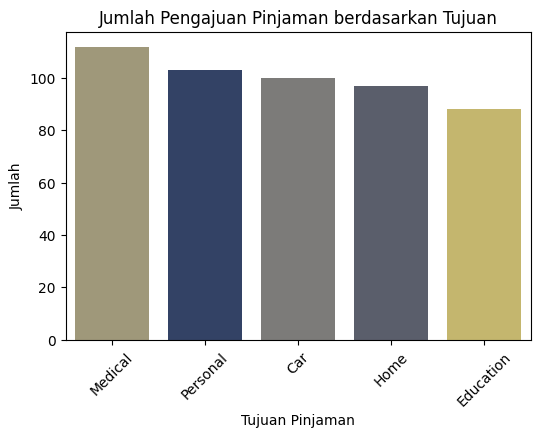

In [9]:
# 4. Countplot tujuan pinjaman
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Loan_Purpose"], hue=df["Loan_Purpose"], palette="cividis", order=df["Loan_Purpose"].value_counts().index, legend=False)
plt.title("Jumlah Pengajuan Pinjaman berdasarkan Tujuan")
plt.xlabel("Tujuan Pinjaman")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

Visualisasi countplot tujuan pinjaman menunjukkan distribusi jumlah pengajuan pinjaman berdasarkan tujuan penggunaan. Kategori Medical memiliki jumlah pengajuan terbanyak, sedangkan kategori Education memiliki jumlah pengajuan paling sedikit.

# Pemrosesan Data

In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Lakukan encoding pada fitur kategorikal**

In [11]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Tampilkan dataset setelah encoding
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,3,333,26892,4,0
1,46,90588,2,316,26619,2,1
2,32,113610,3,452,1281,4,1
3,60,117856,1,677,28420,4,0
4,25,58304,3,641,16360,0,0


Hasil encoding fitur kategorikal mengubah nilai teks dalam kolom kategorikal menjadi bentuk numerik. Misalnya, kategori Education_Level yang awalnya berisi nilai seperti High School, Master, dan PhD dikonversi menjadi angka seperti 0, 1, 2. Begitu juga dengan Loan_Purpose, yang semula berisi jenis pinjaman seperti Personal, Home, dan Car kini direpresentasikan dengan angka yang sesuai. Transformasi ini memungkinkan model machine learning untuk memahami data kategorikal dalam bentuk numerik tanpa kehilangan informasi penting.

**Lakukan feature scaling pada fitur numerik**

In [12]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=["Loan_Approval"])
y = df["Loan_Approval"].astype(int)

Pada proses preprocessing data, label "Loan_Approval" tidak boleh terkena standarisasi karena merupakan variabel target (y) yang akan diprediksi oleh model. Standarisasi hanya diterapkan pada fitur (X) untuk menyamakan skala data numerik agar model bekerja lebih optimal. Oleh karena itu, sebelum melakukan standarisasi, kolom "Loan_Approval" dipisahkan terlebih dahulu dari dataset dengan df.drop(columns=["Loan_Approval"]), sehingga hanya fitur yang diproses lebih lanjut.

In [13]:
# Feature Scaling
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Tampilkan data setelah scaling
X.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose
0,1.100655,-1.496205,1.383498,-1.500286,0.026245,1.364844
1,0.353029,0.809486,0.475691,-1.606833,0.006629,-0.042212
2,-0.693647,1.606651,1.383498,-0.754461,-1.813972,1.364844
3,1.399705,1.753674,-0.432116,0.655712,0.136035,1.364844
4,-1.216985,-0.308387,1.383498,0.430084,-0.730507,-1.449267


Hasil scaling fitur numerik menunjukkan bahwa seluruh nilai numerik telah dinormalisasi menggunakan StandardScaler, yang mengubah setiap fitur menjadi distribusi dengan mean = 0 dan standard deviation = 1. Ini berarti nilai dalam kolom seperti Age, Income, Credit Score, dan Loan Amount kini berada dalam skala yang lebih seimbang, tanpa perbedaan rentang yang terlalu besar. Proses ini membantu meningkatkan performa model machine learning dengan memastikan bahwa fitur numerik memiliki kontribusi yang seimbang dalam analisis.

**Bagi dataset menjadi training set (80%) dan testing set (20%)**

In [14]:
# Bagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran dataset setelah split
print("Training Set Shape (X_train):", X_train.shape)
print("Training Labels Shape (y_train):", y_train.shape)
print("Testing Set Shape (X_test):", X_test.shape)
print("Testing Labels Shape (y_test):", y_test.shape)

Training Set Shape (X_train): (400, 6)
Training Labels Shape (y_train): (400,)
Testing Set Shape (X_test): (100, 6)
Testing Labels Shape (y_test): (100,)


Hasil output menunjukkan bahwa dataset telah berhasil dibagi menjadi training set dan testing set dengan ukuran masing-masing (400, 6) dan (100, 6). Ini berarti terdapat 400 sampel dengan 6 fitur dalam training set dan 100 sampel dengan 6 fitur dalam testing set. Proporsi ini sesuai dengan pembagian 80% untuk training dan 20% untuk testing.

In [15]:
# Cek apakah y_train sudah benar (0 dan 1)
print("Unique values in y_train:", np.unique(y_train))

Unique values in y_train: [0 1]


Pengecekan nilai unik pada y_train bertujuan untuk memastikan bahwa label target hanya terdiri dari dua kelas, yaitu 0 dan 1, yang sesuai dengan format yang dibutuhkan oleh model klasifikasi biner. Jika hasilnya menunjukkan nilai selain 0 dan 1, berarti ada kesalahan dalam proses encoding atau pemrosesan data sebelumnya yang perlu diperbaiki sebelum melanjutkan ke tahap pelatihan model.

# Pemilihan dan Training Model

**Pilih minimal dua algoritma Machine Learning yang berbeda. Jelaskan alasan pemilihan tersebut.**

1. Logistic Regression dipilih karena model ini sederhana, interpretatif, dan efektif dalam menangani masalah klasifikasi biner seperti persetujuan pinjaman. Selain itu, logistic regression memberikan probabilitas sebagai output, yang dapat membantu dalam memahami faktor-faktor yang memengaruhi keputusan persetujuan pinjaman.

2. Random Forest dipilih karena merupakan model berbasis pohon keputusan yang kuat dan dapat menangani data dengan fitur numerik serta kategorikal. Algoritma ini juga mampu menangani outlier serta menangkap interaksi kompleks antarvariabel, sehingga dapat memberikan prediksi yang lebih akurat dibandingkan model linier sederhana.

3. XGBoost dipilih karena merupakan algoritma berbasis pohon yang unggul dalam menangani dataset dengan jumlah fitur yang besar serta mampu mengatasi overfitting melalui regularisasi bawaan. Selain itu, XGBoost memiliki kecepatan komputasi yang tinggi dibandingkan algoritma berbasis boosting lainnya, berkat optimasi penggunaan memori dan teknik paralelisasi.

**Lakukan training model menggunakan dataset yang telah diproses**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [17]:
# Logistic Regression
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)

In [18]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=70, bootstrap=True)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [19]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi Model

**Hitung dan bandingkan metric evaluasi dari kedua model yang dipilih**

In [20]:
# Evaluasi Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_pred_log, y_test))

Logistic Regression Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.03      1.00      0.05         1
           1       1.00      0.64      0.78        99

    accuracy                           0.64       100
   macro avg       0.51      0.82      0.42       100
weighted avg       0.99      0.64      0.77       100



In [21]:
# Evaluasi Random Forest
print("Random Forest Accuracy:", accuracy_score(y_pred_rf, y_test))
print(classification_report(y_pred_rf, y_test))

Random Forest Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.30      0.31      0.31        35
           1       0.62      0.60      0.61        65

    accuracy                           0.50       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.51      0.50      0.50       100



In [22]:
# Evaluasi XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        37
           1       0.70      0.73      0.71        63

    accuracy                           0.63       100
   macro avg       0.60      0.59      0.60       100
weighted avg       0.62      0.63      0.63       100



Pada evaluasi model, accuracy_score digunakan untuk menghitung akurasi prediksi dari masing-masing model, yaitu Logistic Regression dan Random Forest. Selain itu, classification_report menampilkan metrik evaluasi seperti precision, recall, dan f1-score untuk masing-masing kelas dalam dataset. Hasil evaluasi kedua model kemudian dibandingkan untuk menentukan model dengan performa terbaik berdasarkan akurasi dan metrik lainnya.


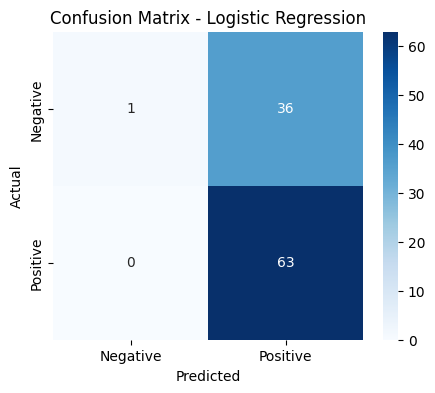

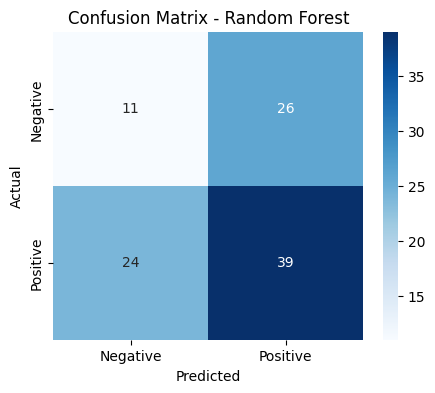

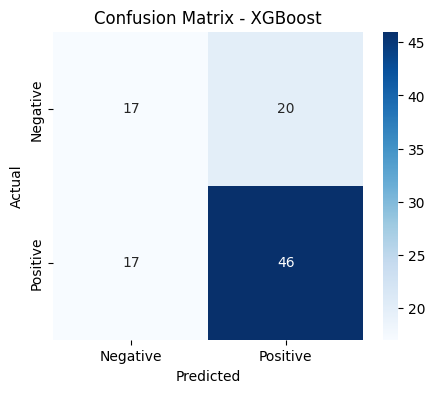

In [23]:
from sklearn.metrics import confusion_matrix

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Confusion Matrix untuk Logistic Regression
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

# Confusion Matrix untuk Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Confusion Matrix untuk XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


**Pilih model dengan performa terbaik untuk tahap tuning**

Meskipun Logistic Regression memiliki akurasi 0.64, sedangkan XGBoost hanya 0.63, XGBoost tetap menjadi pilihan terbaik untuk tahap tuning karena memiliki fleksibilitas yang lebih tinggi dalam menangani data yang kompleks. XGBoost menggunakan teknik boosting, yang memungkinkan model untuk memperbaiki kesalahan prediksi secara iteratif, sehingga berpotensi lebih unggul setelah tuning dibandingkan dengan Logistic Regression, yang merupakan model linear dan lebih terbatas dalam menangkap pola non-linear. Selain itu, XGBoost sering kali lebih tahan terhadap overfitting dan dapat dioptimalkan lebih lanjut dengan berbagai hyperparameter, seperti jumlah estimators, learning rate, dan max depth, yang bisa meningkatkan performanya setelah tuning.

# Tuning Model dengan Grid Search atau Random Search

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**Gunakan Grid Search atau Random Search untuk mencari kombinasi hyperparameter
terbaik**

**Tampilkan kombinasi hyperparameter terbaik yang diperoleh.**

In [30]:
# Definisi parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Train Grid Search
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Score (Grid Search):", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (Grid Search): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Score (Grid Search): 0.5875


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:11:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Perbandingan Performa Sebelum dan Sesudah Tuning

**Bandingkan hasil evaluasi model sebelum dan sesudah tuning.**

In [37]:
# Model dengan hyperparameter terbaik
tuned_xgb = xgb.XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
tuned_xgb.fit(X_train, y_train)
y_pred_tuned_xgb = tuned_xgb.predict(X_test)

# Evaluasi setelah tuning
print("XGBoost (Setelah Tuning)")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_xgb))
print(classification_report(y_test, y_pred_tuned_xgb))

XGBoost (Setelah Tuning)
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:15:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

In [38]:
# Buat DataFrame hasil evaluasi
results = pd.DataFrame({
    "Model": ["XGBoost Sebelum Tuning", "XGBoost Setelah Tuning"],
    "Accuracy": [accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_tuned_xgb)]
})

print(results)

                    Model  Accuracy
0  XGBoost Sebelum Tuning      0.63
1  XGBoost Setelah Tuning      0.63


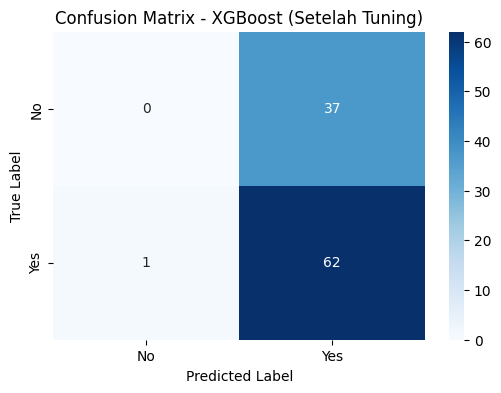

In [29]:
# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_tuned)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (Setelah Tuning)")
plt.show()

**Jelaskan apakah tuning berhasil meningkatkan performa model.**

Tuning yang dilakukan pada model XGBoost tidak berhasil meningkatkan performa, sebagaimana terlihat dari akurasi yang tetap sama, yaitu 0.63, sebelum dan sesudah tuning. Hal ini menunjukkan bahwa perubahan hyperparameter tidak memberikan dampak signifikan terhadap kemampuan model dalam melakukan prediksi.